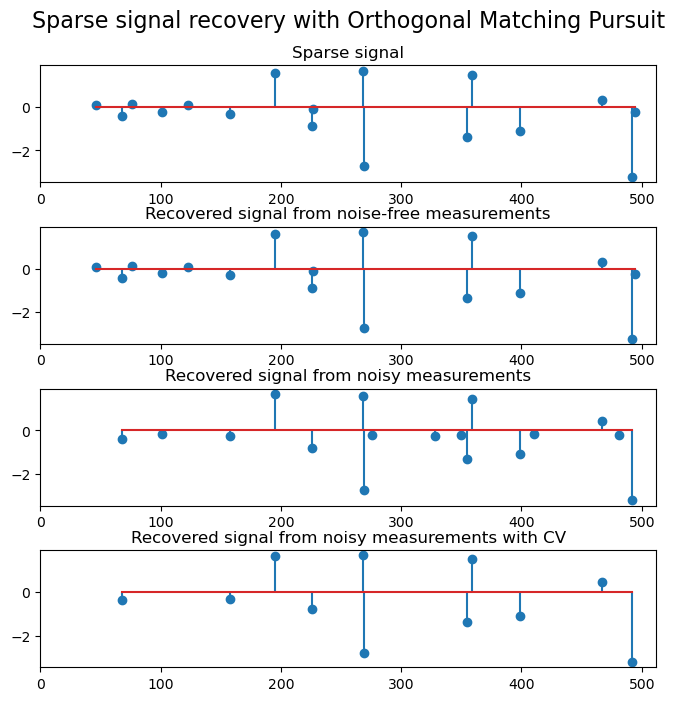

In [2]:
# referance: https://scikit-learn.org/1.5/auto_examples/linear_model/plot_omp.html
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_sparse_coded_signal
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV

n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(
    n_samples=1,
    n_components=n_components,
    n_features=n_features,
    n_nonzero_coefs=n_nonzero_coefs,
    random_state=0,
)
X = X.T

(idx,) = w.nonzero()

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

# plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])

# plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])

# plot the noisy reconstruction with number of non-zeros set by CV
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r])

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle("Sparse signal recovery with Orthogonal Matching Pursuit", fontsize=16)
plt.show()

Recovery error: 0.0010


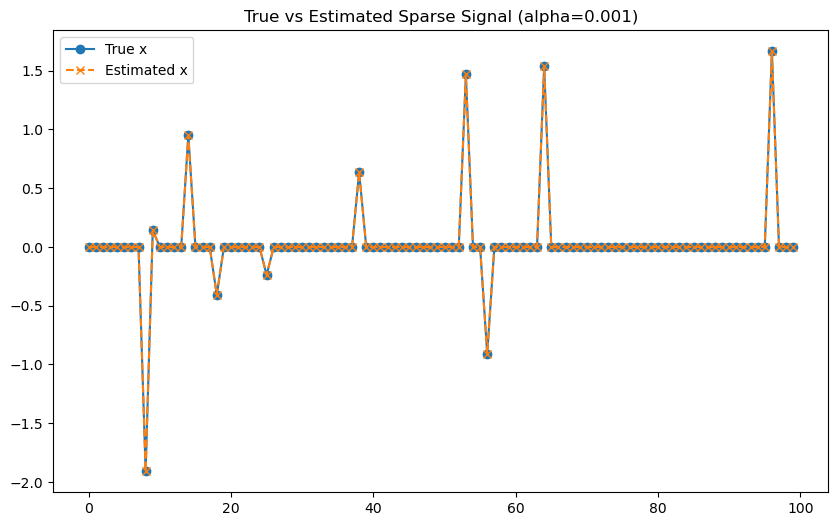

In [4]:
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Generate a true sparse signal x and a measurement matrix A
n = 100  # Dimension of the signal (number of columns)
m = 50   # Number of measurements 
sparsity = 0.1  # Fraction of non-zero entries in x

# True sparse signal x
x_true = np.zeros(n)
non_zero_indices = np.random.choice(n, int(sparsity * n), replace=False)
x_true[non_zero_indices] = np.random.randn(int(sparsity * n))

# Measurement matrix A
A = np.random.randn(m, n)

# Step 3: Compute the measurements y using the same matrix A
y = A @ x_true

# Estimate x using Lasso (L1-regularized least squares)
alpha_value = 0.001  # Manually set alpha value for Lasso
lasso = Lasso(alpha=alpha_value, max_iter=10000)
lasso.fit(A, y)
x_estimated = lasso.coef_

# Calculate the recovery error
recovery_error = np.linalg.norm(x_true - x_estimated) / np.linalg.norm(x_true)
print(f"Recovery error: {recovery_error:.4f}")

# Plot the true and estimated x for comparison
plt.figure(figsize=(10, 6))
plt.plot(x_true, label="True x", marker='o')
plt.plot(x_estimated, label="Estimated x", marker='x', linestyle='--')
plt.title(f"True vs Estimated Sparse Signal (alpha={alpha_value})")
plt.legend()
plt.show()
